In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [39]:
#PROBLEM 1.1 
#CODE CELL 

# CODE START

file = "sample order basket.csv"
df = pd.read_csv(file)

# CODE END
df

,OrderNum,Product
0,1000,eggs
1,1001,bread
2,1002,eggs
3,1002,bread
4,1002,flour
...,...,...
1068,1496,bread
1069,1497,jam
1070,1498,bread
1071,1499,eggs


In [103]:
#PROBLEM 1.2
# CODE CELL

# CODE START


products = df['Product'].unique()
products.sort()
binary_table = df

for i in products: 
    binary_table[i]=df["Product"].str.contains(i)

df.set_index('OrderNum')
df = df.replace({True:1,False:0})

binary_table = df.groupby(['OrderNum']).sum()

# CODE END
binary_table

,bread,cheese,eggs,flour,jam
OrderNum,,,,,
1000,0,0,1,0,0
1001,1,0,0,0,0
1002,1,0,1,1,0
1003,1,0,1,0,1
1004,0,0,1,0,0
...,...,...,...,...,...
1495,1,0,1,1,0
1496,1,1,1,0,0
1497,0,0,0,0,1


In [169]:
#PROBLEM 1.3 

#CODE CELL 

#CODE START

combos=binary_table.copy()
combos= df.groupby('OrderNum').sum()

dictionary=combinations.to_dict()

combi = "combination"
count = "count"

report={combi:[], count :[]}

for i in combinations.index:
    combination=[]
    
    for j in combinations.columns:
        if dictionary[j][i]==1:
            combination.append(j)
            
    report[combi].append(combination)
    
report=pd.DataFrame(report,columns=[combi])
report=report.apply(pd.value_counts)
report.reset_index(inplace=True)

report.columns=[combi,count]

#CODE END 
report

,combination,count
0,[bread],65
1,"[bread, jam]",57
2,"[bread, eggs]",47
3,"[bread, eggs, jam]",46
4,[eggs],31
5,[jam],26
6,"[bread, eggs, flour]",21
7,"[bread, flour, jam]",18
8,"[bread, cheese, eggs]",17
9,"[eggs, jam]",17


In [322]:
#PROBLEM 2.1 
# CODE CELL

# CODE START
import requests
import time
import json

start = time.time()
stop = 0
iss_data = []
while stop <= 1800:
    
    r = requests.get(url="http://api.open-notify.org/iss-now.json")
    iss_data.append(r.json())
    time.sleep(10)
    stop = time.time()-start
    
with open("iss-data.json","w") as data:
    json.dump(iss_data, data,indent=2)
# CODE END


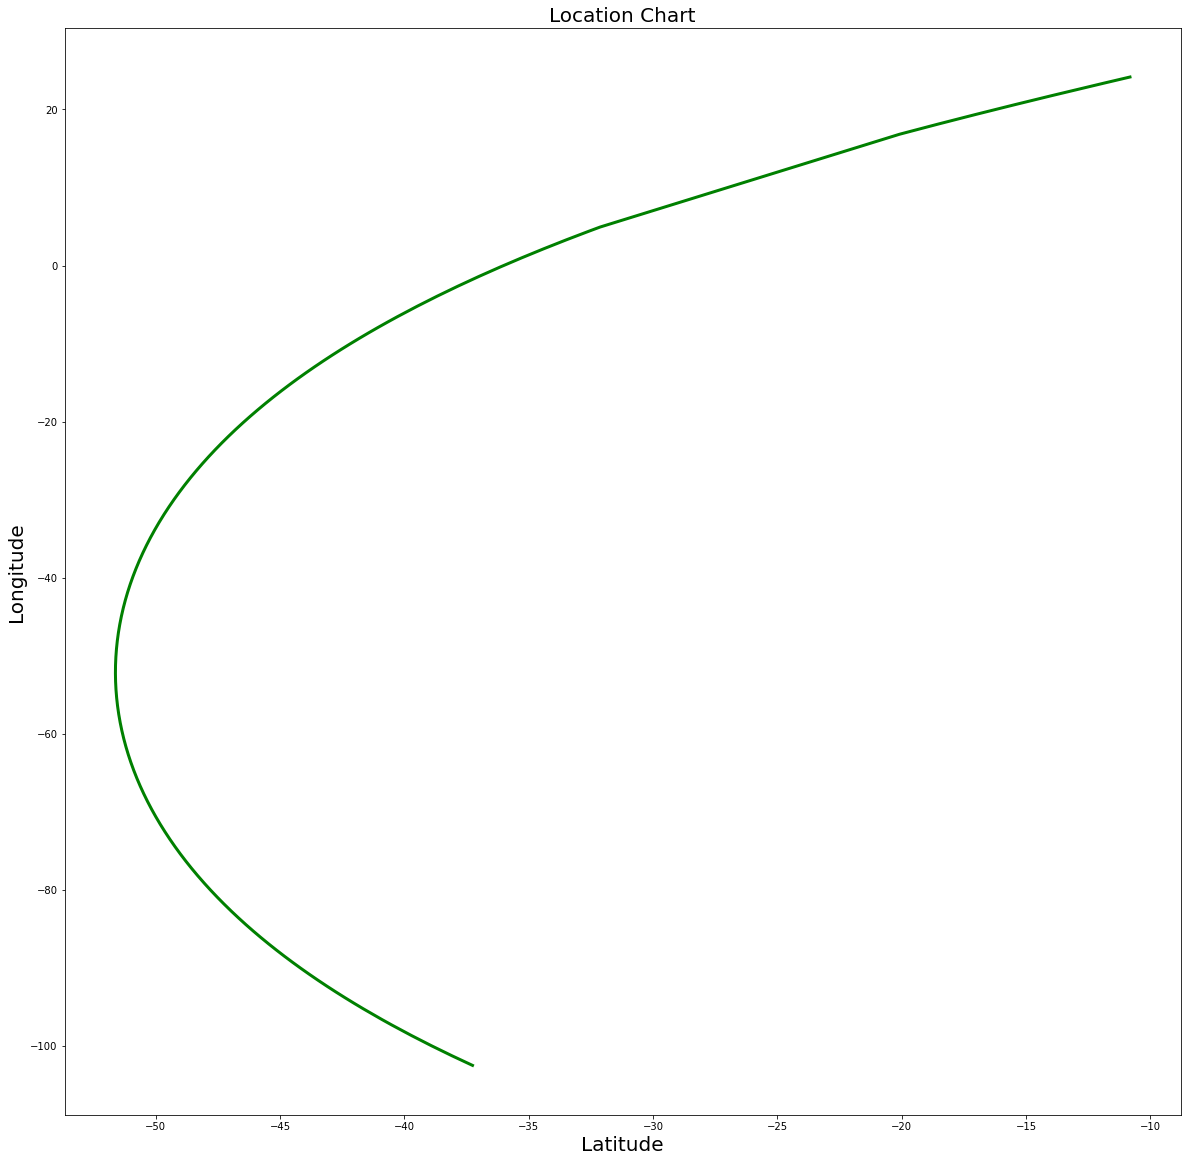

In [337]:
#PROBLEM 2.2 
# CODE CELL

# CODE START

import json

with open("iss-data.json", "r") as file:
    dump= json.loads(file.read())

x = []
y = []

for i in dump:
    latitude = float(i["iss_position"]["latitude"])
    longitude = float(i["iss_position"]["longitude"])
    x.append(latitude)
    y.append(longitude)

    
fig,axes = plt.subplots(figsize = (20,20))

axes.plot(x,y, "g", lw=3)
axes.set_xlabel("Latitude",fontsize=20)
axes.set_ylabel("Longitude",fontsize=20)
axes.set_title("Location Chart",fontsize=20)

plt.show()

# CODE END
